In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np

In [13]:
dataset_train = pd.read_csv ("Google_Stock_Price_Train.csv")

In [3]:
dataset_train.tail

<bound method NDFrame.tail of             Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5      1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6      1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7      1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8      1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9      1/17/2012  314.81  314.81  311.67  626.86   3,832,800
10     1/18/2012  312.14  315.82  309.90  631.18   5,544,000
11     1/19/2012  319.30  319.30  314.55  637.82  12,657,800
12     1/20/2012  294.16  294.40  289.76  584.39  21,231,800
13     1/23/2012  291.91  293.23  290.49  583.92   6,851,300
14     1/24/2012  292.07  292.74  287.92  579.34   6,13

In [47]:
training_set = dataset_train.iloc [:, 1 : 2].values

In [48]:
training_set.shape

(1258, 1)

In [49]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

In [50]:
sc = MinMaxScaler (feature_range = (0, 1))

In [51]:
training_set_scaled = sc.fit_transform (training_set)

In [52]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [53]:
#Creating a data structure with 60 timesteps and aone output

In [54]:
X_train = []
y_train = []

In [55]:
for i in range (60, 1258):
    X_train.append (training_set_scaled [i-60 : i, 0])
    y_train.append (training_set_scaled [i : i+1, 0])

In [56]:
X_train, y_train = np.array (X_train), np.array (y_train)

In [57]:
X_train.shape

(1198, 60)

In [58]:
y_train.shape

(1198, 1)

In [59]:
#Reshaping

In [60]:
X_train = np.reshape (X_train, (X_train.shape [0], X_train.shape [1], 1))

In [61]:
X_train.shape

(1198, 60, 1)

In [62]:
#Building the RNN

In [63]:
#Importing keras libraries and packages

In [64]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [65]:
#Initialising the RNN

In [66]:
regressor = Sequential ()

W0905 16:13:46.709423 140267700062016 deprecation_wrapper.py:119] From /home/dishebh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [67]:
#Adding first LSTM layer and some dropout regularisation

In [68]:
regressor.add (LSTM (50, input_shape = (X_train.shape [1], 1), return_sequences = True))
regressor.add (Dropout (0.2))

W0905 16:13:47.853887 140267700062016 deprecation_wrapper.py:119] From /home/dishebh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 16:13:47.989540 140267700062016 deprecation_wrapper.py:119] From /home/dishebh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 16:13:48.932642 140267700062016 deprecation_wrapper.py:119] From /home/dishebh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0905 16:13:48.938280 140267700062016 deprecation.py:506] From /home/dishebh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is dep

In [69]:
#Adding second LSTM layer and some dropout regularisation

In [70]:
regressor.add (LSTM (50, return_sequences = True))
regressor.add (Dropout (0.2))

In [71]:
#Adding third LSTM layer and some dropout regularisation

In [72]:
regressor.add (LSTM (50, return_sequences = True))
regressor.add (Dropout (0.2))

In [73]:
#Adding fourth LSTM layer and some dropout regularisation

In [74]:
regressor.add (LSTM (50))
regressor.add (Dropout (0.2))

In [75]:
#Adding the output layer

In [76]:
regressor.add (Dense (1))

In [77]:
#Compiling the RNN

In [78]:
regressor.compile (optimizer = 'Adam', loss = 'mean_squared_error', )

W0905 16:13:53.432603 140267700062016 deprecation_wrapper.py:119] From /home/dishebh/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [79]:
#Fitting the RNN to the training set

In [80]:
regressor.fit (X_train, y_train, batch_size = 32, epochs = 100)

W0905 16:13:56.632599 140267700062016 deprecation.py:323] From /home/dishebh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0905 16:13:58.811950 140267700062016 deprecation_wrapper.py:119] From /home/dishebh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0409
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0058
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - lo

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013


In [81]:
#Predicting the stock prices of 2017 and visualising the resuts

In [82]:
#Getting the real stock prices of 2017

In [83]:
dataset_test = pd.read_csv ("Google_Stock_Price_Test.csv")

In [84]:
dataset_test.head

<bound method NDFrame.head of          Date    Open    High     Low   Close     Volume
0    1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1    1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2    1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3    1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4    1/9/2017  806.40  809.97  802.83  806.65  1,272,400
5   1/10/2017  807.86  809.13  803.51  804.79  1,176,800
6   1/11/2017  805.00  808.15  801.37  807.91  1,065,900
7   1/12/2017  807.14  807.39  799.17  806.36  1,353,100
8   1/13/2017  807.48  811.22  806.69  807.88  1,099,200
9   1/17/2017  807.08  807.14  800.37  804.61  1,362,100
10  1/18/2017  805.81  806.21  800.99  806.07  1,294,400
11  1/19/2017  805.12  809.48  801.80  802.17    919,300
12  1/20/2017  806.91  806.91  801.69  805.02  1,670,000
13  1/23/2017  807.25  820.87  803.74  819.31  1,963,600
14  1/24/2017  822.30  825.90  817.82  823.87  1,474,000
15  1/25/2017  829.62  835.77  825.06  835.67  1,494,500
1

In [85]:
real_stock_price = dataset_test.iloc [:, 1 : 2].values

In [86]:
real_stock_price.shape

(20, 1)

In [87]:
#Getting the predicted stock price of 2017

In [88]:
dataset_total = pd.concat ((dataset_train ["Open"], dataset_test ["Open"]), axis = 0)

In [89]:
dataset_total.head

<bound method NDFrame.head of 0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
5       313.70
6       310.59
7       314.43
8       311.96
9       314.81
10      312.14
11      319.30
12      294.16
13      291.91
14      292.07
15      287.68
16      284.92
17      284.32
18      287.95
19      290.41
20      291.38
21      291.34
22      294.23
23      296.39
24      302.44
25      303.18
26      304.87
27      302.81
28      304.11
29      304.63
         ...  
1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, Length: 1278, dtype: float64>

In [90]:
inputs = dataset_total [len (dataset_total) - len (dataset_test) - 60 : ].values

In [91]:
inputs.shape

(80,)

In [92]:
len (dataset_total) - len (dataset_test) 

1258

In [93]:
inputs = inputs.reshape (-1, 1)

In [94]:
inputs.shape

(80, 1)

In [95]:
inputs = sc.transform (inputs)

In [96]:
X_test = []

In [97]:
for i in range (60, 80):
    X_test.append (inputs [i - 60 : i, 0])

In [98]:
X_test = np.array (X_test)

In [99]:
X_test.shape

(20, 60)

In [100]:
X_test = np.reshape (X_test, (X_test.shape [0], X_test.shape [1], 1))

In [101]:
X_test.shape

(20, 60, 1)

In [102]:
predicted_stock_price = regressor.predict (X_test)
predicted_stock_price = sc.inverse_transform (predicted_stock_price)

In [103]:
#Visualising the results

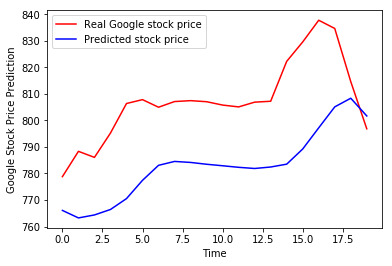

In [105]:
plt.plot (real_stock_price, color = 'red', label = 'Real Google stock price')
plt.plot (predicted_stock_price, color = 'blue', label = 'Predicted stock price')
plt.xlabel ('Time')
plt.ylabel ('Google Stock Price Prediction')
plt.legend ()
plt.show ()